<a href="https://colab.research.google.com/github/Seongjin1225/BigData/blob/main/%EC%84%9C%EC%9A%B8%EC%8B%9C_%EC%9D%91%EA%B8%89%EC%9D%98%EB%A3%8C%EA%B8%B0%EA%B4%80_%ED%98%84%ED%99%A9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# 한글폰트깨짐 방지(실행 후 런타임 다시 시작 필요!)
# plt.rcParams['font.family'] = 'NanumGothic' 적어줘야 함
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

In [ ]:
# 필요 라이브러리 호출
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import seaborn as sns
import folium

In [ ]:
# Raw Data Loading
df_seoul = pd.read_csv('/content/drive/MyDrive/BigData/서울시 응급실 위치 정보.csv',encoding='cp949')
df_seoul

,기관ID,주소,병원분류,병원분류명,응급의료기관코드,응급의료기관코드명,응급실운영여부,비고,기관설명상세,간이약도,...,진료시간(목요일)S,진료시간(금요일)S,진료시간(토요일)S,진료시간(일요일)S,진료시간(공휴일)S,우편번호1,우편번호2,병원경도,병원위도,작업시간
0,A1100011,"서울특별시 영등포구 63로 10, 여의도성모병원 (여의도동)",A,종합병원,G006,지역응급의료센터,1,휴게시간 13:00~14:00,저희 치과는 임플란트 보철 사랑니수술 등 치아에 관련된 모든 치료가능합니다(교정과도...,샛강역 3번 출구,...,900,900,900,1000,930,73,45,126.936731,37.518272,2024-10-07 15:10:17.0
1,A1121013,서울특별시 은평구 통일로 1021 (진관동),A,종합병원,G006,지역응급의료센터,1,휴게시간 13:00~14:00,저희 치과는 임플란트 보철 사랑니수술 등 치아에 관련된 모든 치료가능합니다(교정과도...,샛강역 3번 출구,...,830,830,830,1000,930,33,12,126.916150,37.633608,2024-10-07 15:10:17.0
2,A1100047,서울특별시 관악구 관악로 242 (봉천동),B,병원,G009,응급실운영신고기관,1,응급실진료 07:00-24:00 08/15 광복절 휴무,화요일 야간진료 예약시 21시까지,서울대입구역 7번 출구 도보 5분,...,900,900,900,1000,1000,87,35,126.956782,37.485619,2024-10-07 15:10:17.0
3,A1123234,"서울특별시 강남구 선릉로 404, 더드림병원 (대치동)",B,병원,G009,응급실운영신고기관,1,응급실 00:00-24:00,화요일 야간진료 예약시 21시까지,한티역 1번출구 3분거리,...,900,900,900,1000,1000,61,98,127.050967,37.500990,2024-10-07 15:10:17.0
4,A1100141,"서울특별시 강남구 남부순환로 2649, 베드로병원 (도곡동)",A,종합병원,G009,응급실운영신고기관,1,외래 진료 운영시간 이외에는 응급의학과 전문의 근무,24시간 응급실 운영 응급의학과 정형외과(사지골절) 신경외과(뇌척추 수술) 내과(소...,양재역 4번 출구 도보 5분 거리,...,0,0,0,0,0,62,71,127.039587,37.485612,2024-10-07 15:10:17.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66,A1100038,"서울특별시 영등포구 버드나루로7길 12 (영등포동7가, 한강성심병원)",A,종합병원,G009,응급실운영신고기관,1,진료과에따라 상이함(연락 후 내원 바람),점심 12:30~13:30,서울특별시 영등포구 버드나루로7길 12 (영등포동 7가 94-200),...,900,900,830,1000,1000,72,47,126.910330,37.523467,2024-10-07 15:10:45.0
67,A1100013,서울특별시 성동구 왕십리로 222-1 (사근동),A,종합병원,G001,권역응급의료센터,1,휴게시간 평일 13:00~14:00,관절염/류마티스 전문/,"한양대역 1번 출구 왕십리역:6번,13번 출구->650M(도보10분) 왕십리역:6-...",...,900,900,900,930,900,47,63,127.044883,37.559945,2024-10-07 15:10:45.0
68,A1100051,서울특별시 광진구 자양로 85 (자양동),A,종합병원,G007,지역응급의료기관,1,휴게시간 평일 13:00~14:00,24시간 전문의 진료가 가능한 서울 동북부 지역 거점병원입니다.,2호선 구의역 4번출구 직진방향 5분 거리,...,830,830,830,900,900,50,56,127.083601,37.535316,2024-10-07 15:10:46.0
69,A1100019,"서울특별시 양천구 목동로 225, 홍익병원본관 (신정동)",A,종합병원,G007,지역응급의료기관,1,토요일은 격주근무로 내원전 휴진여부 확인이 필요합니다.,후두내시경O/수액처치O,목동역 2번 출구,...,900,900,900,900,1030,79,37,126.863664,37.528441,2024-10-07 15:10:46.0


In [ ]:
df_seoul.columns

Index(['기관ID', '주소', '병원분류', '병원분류명', '응급의료기관코드', '응급의료기관코드명', '응급실운영여부', '비고',
       '기관설명상세', '간이약도', '기관명', '대표전화1', '응급실전화', '진료시간(월요일)C', '진료시간(화요일)C',
       '진료시간(수요일)C', '진료시간(목요일)C', '진료시간(금요일)C', '진료시간(토요일)C', '진료시간(일요일)C',
       '진료시간(공휴일)C', '진료시간(월요일)S', '진료시간(화요일)S', '진료시간(수요일)S', '진료시간(목요일)S',
       '진료시간(금요일)S', '진료시간(토요일)S', '진료시간(일요일)S', '진료시간(공휴일)S', '우편번호1',
       '우편번호2', '병원경도', '병원위도', '작업시간'],
      dtype='object')

In [ ]:
# 주소, 병원분류, 응급의료기관코드명, 응급실운영여부 만 따로 선택
df = df_seoul[['주소','응급의료기관코드명']]
df.tail()
df.to_csv('address.csv')

# 위도,경도 추가한 csv 파일 가져오기
gu = pd.read_csv('/content/drive/MyDrive/BigData/address - address.csv')
gu.drop(['Unnamed: 0'],axis=1,inplace=True)
gu.drop(index=0,inplace=True)
gu

,주소,Latitude,Longitude,응급의료기관코드명
1,"서울특별시 영등포구 63로 10, 여의도성모병원 (여의도동)",37.5182841,126.9367077,지역응급의료센터
2,서울특별시 은평구 통일로 1021 (진관동),37.6335822,126.9161092,지역응급의료센터
3,서울특별시 관악구 관악로 242 (봉천동),37.4855464,126.9567668,응급실운영신고기관
4,"서울특별시 강남구 선릉로 404, 더드림병원 (대치동)",37.5009796,127.0509508,응급실운영신고기관
5,"서울특별시 강남구 남부순환로 2649, 베드로병원 (도곡동)",37.4856105,127.0395828,응급실운영신고기관
...,...,...,...,...
67,"서울특별시 영등포구 버드나루로7길 12 (영등포동7가, 한강성심병원)",37.523134,126.9096815,응급실운영신고기관
68,서울특별시 성동구 왕십리로 222-1 (사근동),37.5623475,127.0468637,권역응급의료센터
69,서울특별시 광진구 자양로 85 (자양동),37.5351884,127.0834641,지역응급의료기관
70,"서울특별시 양천구 목동로 225, 홍익병원본관 (신정동)",37.5284913,126.8636621,지역응급의료기관


       구  counts
0    강남구       6
1    강동구       3
2    강북구       3
3    강서구       5
4    관악구       4
5    광진구       2
6    구로구       2
7    금천구       1
8    노원구       3
9    도봉구       1
10  동대문구       4
11   동작구       2
12   마포구       1
13  서대문구       2
14   서초구       1
15   성동구       2
16   성북구       1
17   송파구       2
18   양천구       3
19  영등포구       9
20   용산구       1
21   은평구       3
22   종로구       5
23    중구       2
24   중랑구       3


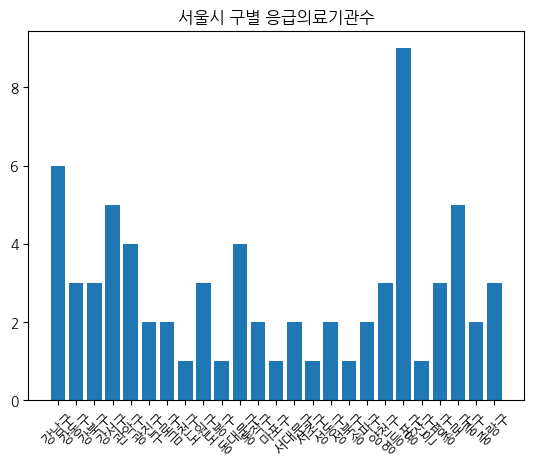

In [ ]:
# 주소 컬럼에서 '구'만 남기고 모두 삭제
df.loc[:, '구'] = df['주소'].str.extract('(\\w*구)')
df = df.drop(['주소'],axis=1)
df

# 컬럼 순서 재배치
df = df[['구','응급의료기관코드명']]
# gu = df.groupby('구').count()
gu = df.groupby('구').size().reset_index(name='counts')
print(gu)
# 그래프 시각화
import matplotlib.font_manager as fm

plt.title('서울시 구별 응급의료기관수')
plt.xticks(rotation=45)
plt.rcParams['font.family'] = 'NanumGothic'
plt.bar(gu['구'],gu['counts'])
plt.show()


In [ ]:
import json
from folium import Map, Choropleth, Marker
from folium.features import DivIcon

info = gu[['구','counts']]

# # 지도 생성
map = folium.Map(location=[37.56, 126.97], zoom_start=12)

locs = {"강동구":(37.55591, 127.1354),
        "송파구":(37.51102, 127.1016),
        "강남구":(37.49829, 127.0394),
        "서초구":(37.48855, 126.9878),
        "동작구":(37.50472, 126.9420),
        "관악구":(37.47081, 126.9270),
        "금천구":(37.45604, 126.8963),
        "영등포구":(37.52560, 126.9041),
        "용산구":(37.53801, 126.9709),
        "구로구":(37.49910, 126.8334),
        "양천구":(37.52323, 126.8405),
        "강서구":(37.56192, 126.8082),
        "마포구":(37.56212, 126.8876),
        "서대문구":(37.57946, 126.9206),
        "은평구":(37.61690, 126.9134),
        "중구":(37.56211, 126.9815),
        "종로구":(37.58347, 126.9726),
        "광진구":(37.54771, 127.0695),
        "성동구":(37.55151, 127.0311),
        "동대문구":(37.58462, 127.0380),
        "성북구":(37.60572, 127.0084),
        "중랑구":(37.60120, 127.0799),
        "노원구":(37.64055, 127.0651),
        "강북구":(37.63934, 126.9999),
        "도봉구":(37.67042, 127.0195)}

# 서울시 구별 경계 데이터
state_geo = 'https://raw.githubusercontent.com/southkorea/seoul-maps/master/kostat/2013/json/seoul_municipalities_geo_simple.json'

# Choropleth를 사용하여 지도에 시각화합니다
folium.Choropleth(
    geo_data=state_geo,
    data=info,
    columns=['구', 'counts'],
    key_on='feature.properties.name',
    fill_color='PuRd',  # Blues
    fill_opacity=0.7,
    line_opacity=0.3,
    color='black',
    legend_name='서울시 구별 응급의료기관 수(2024)'
).add_to(map)

# 지도 위 텍스트 표시
for key, value in locs.items():
    Marker(
        [value[0], value[1]],
        icon=DivIcon(
            icon_size=(0, 0),
            icon_anchor=(0, 0),
            html=f'<div style="font-size: 1.5rem; color: black; background-color:rgba(255, 255, 255, 0.2); width:85px; '\
            f'text-align:center; margin:0px;"><b>{key}</b></div>'
        )
    ).add_to(map)

map

In [ ]:
# 응급 시설 지도 히트맵
from folium.plugins import HeatMap
map = folium.Map(location=[37.5665, 126.9780], zoom_start=12)
HeatMap(data=gu[['Latitude', 'Longitude']]).add_to(map)
map

In [ ]:
marker_map = folium.Map(location=[37.5665, 126.9780], zoom_start=12)
for idx, row in gu.iterrows():
    folium.Marker(location=[row['Latitude'], row['Longitude']], popup=row['주소'],
                  icon=folium.Icon(color='blue',icon='star')).add_to(marker_map)
marker_map

In [ ]:
import json
from folium import Map, Choropleth, Marker
from folium.features import DivIcon

info = df.groupby('구').size().reset_index(name='counts')

# # 지도 생성
map = folium.Map(location=[37.56, 126.97], zoom_start=12)

locs = {"강동구":(37.55591, 127.1354),
        "송파구":(37.51102, 127.1016),
        "강남구":(37.49829, 127.0394),
        "서초구":(37.48855, 126.9878),
        "동작구":(37.50472, 126.9420),
        "관악구":(37.47081, 126.9270),
        "금천구":(37.45604, 126.8963),
        "영등포구":(37.52560, 126.9041),
        "용산구":(37.53801, 126.9709),
        "구로구":(37.49910, 126.8334),
        "양천구":(37.52323, 126.8405),
        "강서구":(37.56192, 126.8082),
        "마포구":(37.56212, 126.8876),
        "서대문구":(37.57946, 126.9206),
        "은평구":(37.61690, 126.9134),
        "중구":(37.56211, 126.9815),
        "종로구":(37.58347, 126.9726),
        "광진구":(37.54771, 127.0695),
        "성동구":(37.55151, 127.0311),
        "동대문구":(37.58462, 127.0380),
        "성북구":(37.60572, 127.0084),
        "중랑구":(37.60120, 127.0799),
        "노원구":(37.64055, 127.0651),
        "강북구":(37.63934, 126.9999),
        "도봉구":(37.67042, 127.0195)}

# 서울시 구별 경계 데이터
state_geo = 'https://raw.githubusercontent.com/southkorea/seoul-maps/master/kostat/2013/json/seoul_municipalities_geo_simple.json'

# Choropleth를 사용하여 지도에 시각화합니다
folium.Choropleth(
    geo_data=state_geo,
    data=info,
    columns=['구', 'counts'],
    key_on='feature.properties.name',
    fill_color='YlOrRd',  # Blues
    fill_opacity=0.7,
    line_opacity=0.3,
    color='black',
    legend_name='구별 응급실 현황'
).add_to(map)

# 지도 위 텍스트 표시
for key, value in locs.items():
    Marker(
        [value[0], value[1]],
        icon=DivIcon(
            icon_size=(0, 0),
            icon_anchor=(0, 0),
            html=f'<div style="font-size: 1.5rem; color: black; background-color:rgba(255, 255, 255, 0.2); width:85px; '\
            f'text-align:center; margin:0px;"><b>{key}</b></div>'
        )
    ).add_to(map)

map